In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

## The Fuzzy Approach

In [2]:
def f(service , food):
    servRatio=0.8
    
    # Establish constants
    lowTip = 0.05
    averTip = 0.15 
    highTip = 0.25
    tipRange = highTip - lowTip
    
    badService = 0
    okayService = 3
    goodService = 7
    greatService = 10
    serviceRange = greatService - badService
    
    badFood = 0
    greatFood = 10
    foodRange = greatFood - badFood

    # If service is poor or food is rancid, tip is cheap
    if service<okayService:
        return (((averTip-lowTip)/(okayService-badService))*service+lowTip)*servRatio + (1-servRatio)*(tipRange/foodRange*food+lowTip)
    # If service is good, tip is average
    elif service<goodService:
        return averTip*servRatio + (1-servRatio)*(tipRange/foodRange*food+lowTip)
    # If service is excellent or food is delicious, tip is generous
    else:
        return (((highTip-averTip)/(greatService-goodService))*(service-goodService)+averTip)*servRatio + (1-servRatio)*(tipRange/foodRange*food+lowTip)

In [3]:
vfunc  = np.vectorize(f)

In [4]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

X, Y = np.meshgrid(x, y)
Z = vfunc(X, Y)

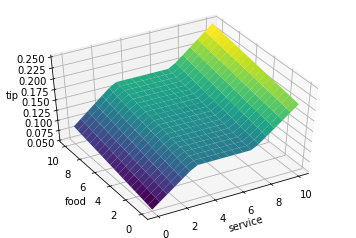

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(45, 240)
ax.set_xlabel('service')
ax.set_ylabel('food')
ax.set_zlabel('tip');